In [ ]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


Heater Output: 91.56%
Light Intensity Output: 53.93%


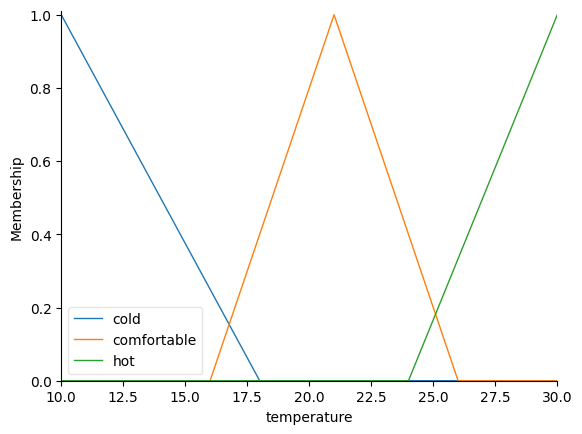

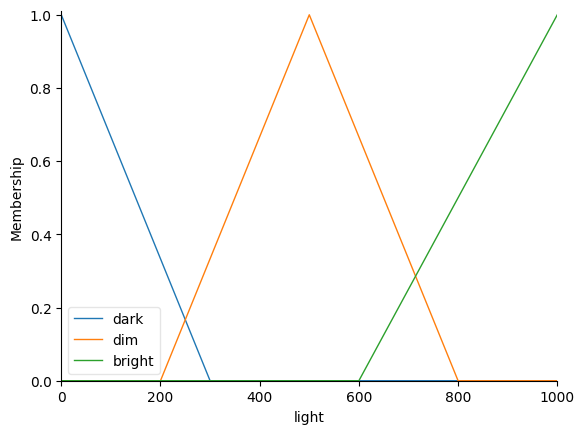

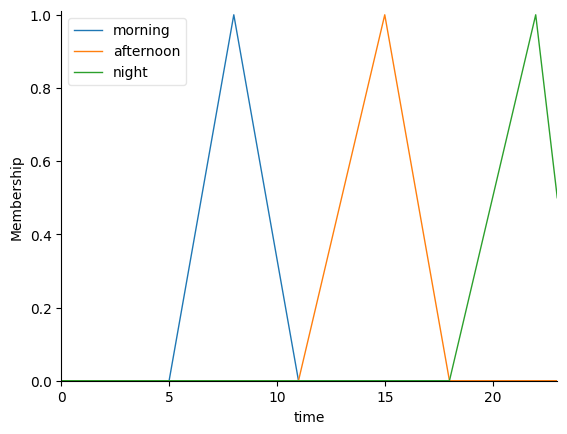

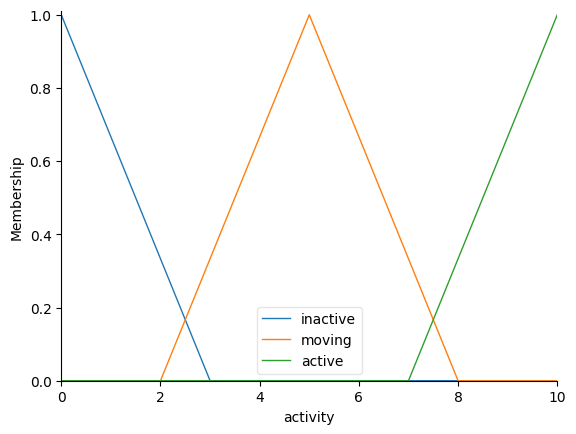

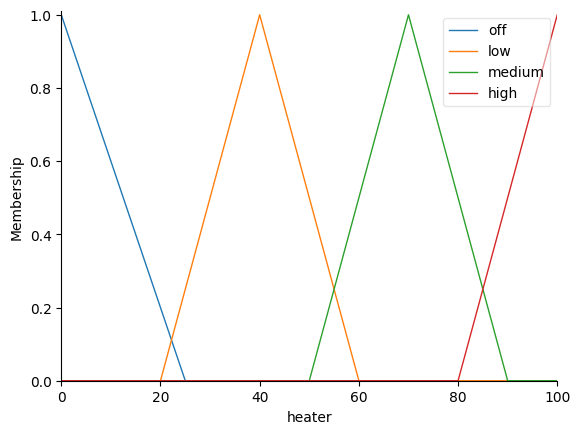

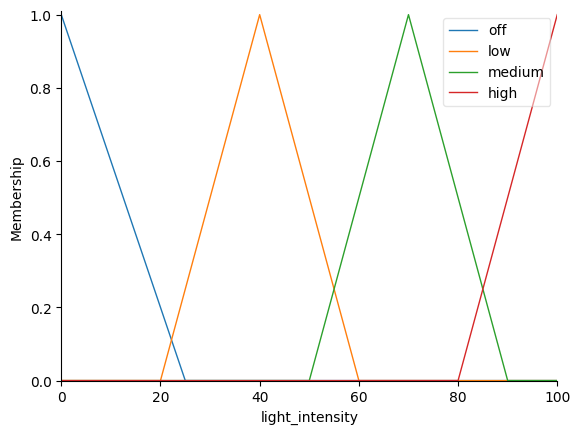

In [ ]:
# Smart Bedroom Fuzzy Logic Controller using scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
temperature = ctrl.Antecedent(np.arange(10, 31, 1), 'temperature')
light = ctrl.Antecedent(np.arange(0, 1010, 10), 'light')
time = ctrl.Antecedent(np.arange(0, 24, 1), 'time')
activity = ctrl.Antecedent(np.arange(0, 11, 1), 'activity')

heater = ctrl.Consequent(np.arange(0, 101, 1), 'heater')
light_intensity = ctrl.Consequent(np.arange(0, 101, 1), 'light_intensity')

# Membership functions for temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [10, 10, 18])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [16, 21, 26])
temperature['hot'] = fuzz.trimf(temperature.universe, [24, 30, 30])

# Membership functions for light
light['dark'] = fuzz.trimf(light.universe, [0, 0, 300])
light['dim'] = fuzz.trimf(light.universe, [200, 500, 800])
light['bright'] = fuzz.trimf(light.universe, [600, 1000, 1000])

# Membership functions for time
time['morning'] = fuzz.trimf(time.universe, [5, 8, 11])
time['afternoon'] = fuzz.trimf(time.universe, [11, 15, 18])
time['night'] = fuzz.trimf(time.universe, [18, 22, 24])

# Membership functions for activity
activity['inactive'] = fuzz.trimf(activity.universe, [0, 0, 3])
activity['moving'] = fuzz.trimf(activity.universe, [2, 5, 8])
activity['active'] = fuzz.trimf(activity.universe, [7, 10, 10])

# Membership functions for heater
heater['off'] = fuzz.trimf(heater.universe, [0, 0, 25])
heater['low'] = fuzz.trimf(heater.universe, [20, 40, 60])
heater['medium'] = fuzz.trimf(heater.universe, [50, 70, 90])
heater['high'] = fuzz.trimf(heater.universe, [80, 100, 100])

# Membership functions for light intensity
light_intensity['off'] = fuzz.trimf(light_intensity.universe, [0, 0, 25])
light_intensity['low'] = fuzz.trimf(light_intensity.universe, [20, 40, 60])
light_intensity['medium'] = fuzz.trimf(light_intensity.universe, [50, 70, 90])
light_intensity['high'] = fuzz.trimf(light_intensity.universe, [80, 100, 100])

# Rules
rules = [
    ctrl.Rule(temperature['cold'] & activity['inactive'], heater['high']),
    ctrl.Rule(temperature['cold'] & activity['active'], heater['medium']),
    ctrl.Rule(temperature['comfortable'] & time['night'], heater['low']),
    ctrl.Rule(temperature['hot'], heater['off']),
    ctrl.Rule(light['dark'] & time['night'], light_intensity['low']),
    ctrl.Rule(light['bright'] & time['afternoon'], light_intensity['off']),
    ctrl.Rule(light['dim'] & activity['moving'], light_intensity['medium']),
    ctrl.Rule(light['dark'] & activity['inactive'], light_intensity['high']),
]

# Control systems
heater_ctrl = ctrl.ControlSystem(rules[:4])
light_ctrl = ctrl.ControlSystem(rules[4:])

heater_sim = ctrl.ControlSystemSimulation(heater_ctrl)
light_sim = ctrl.ControlSystemSimulation(light_ctrl)

# Provide sample inputs
heater_sim.input['temperature'] = 15
heater_sim.input['activity'] = 2
light_sim.input['light'] = 150
light_sim.input['time'] = 20
light_sim.input['activity'] = 2

# Compute outputs
heater_sim.compute()
light_sim.compute()

print("Heater Output: {:.2f}%".format(heater_sim.output['heater']))
print("Light Intensity Output: {:.2f}%".format(light_sim.output['light_intensity']))

# Optional: Plot membership functions
temperature.view()
light.view()
time.view()
activity.view()
heater.view()
light_intensity.view()
plt.show()


Optimization Results (D=2, 5 runs):
  Function              Optimizer  Dimensions         Best        Worst         Mean      Std Dev
    Sphere Differential Evolution           2 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
    Sphere    Simulated Annealing           2 3.002051e-17 9.124353e-15 1.859059e-15 3.632654e-15
Rosenbrock Differential Evolution           2 4.979684e-30 4.979684e-30 4.979684e-30 0.000000e+00
Rosenbrock    Simulated Annealing           2 4.236023e-12 4.647264e-11 2.056013e-11 1.719751e-11
 Rastrigin Differential Evolution           2 0.000000e+00 9.949591e-01 1.989918e-01 3.979836e-01
 Rastrigin    Simulated Annealing           2 0.000000e+00 1.065814e-14 6.394885e-15 3.480934e-15


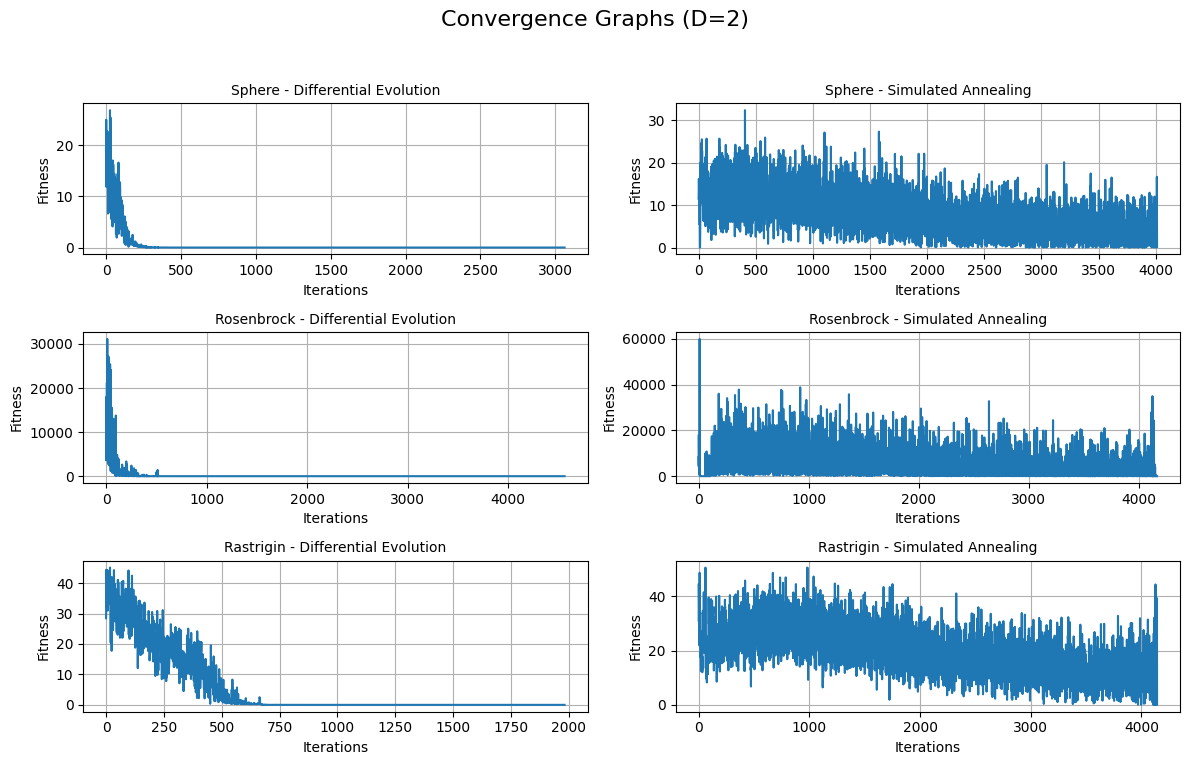

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import differential_evolution, dual_annealing

# Define Benchmark Functions
def sphere(x):
    return np.sum(np.square(x))

def rosenbrock(x):
    return sum(100.0*(x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

def rastrigin(x):
    return 10*len(x) + sum([(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

functions = {'Sphere': sphere, 'Rosenbrock': rosenbrock, 'Rastrigin': rastrigin}
optimizers = {
    'Differential Evolution': differential_evolution,
    'Simulated Annealing': dual_annealing
}
bounds = [(-5, 5)] * 2  # D = 2

# Tracker Class to record fitness values
class FitnessTracker:
    def __init__(self, func):
        self.func = func
        self.history = []

    def __call__(self, x):
        fx = self.func(x)
        self.history.append(fx)
        return fx

# Run Optimization and Collect Statistics
results_demo = []
convergence_data = {}

for fname, func in functions.items():
    for oname, optimizer in optimizers.items():
        scores = []
        all_histories = []
        for run in range(5):
            tracker = FitnessTracker(func)
            result = optimizer(tracker, bounds)
            scores.append(result.fun)
            all_histories.append(tracker.history)

        scores = np.array(scores)
        results_demo.append({
            'Function': fname,
            'Optimizer': oname,
            'Dimensions': 2,
            'Best': np.min(scores),
            'Worst': np.max(scores),
            'Mean': np.mean(scores),
            'Std Dev': np.std(scores)
        })

        # Store convergence data
        convergence_data[(fname, oname)] = all_histories

# Display Summary Table
df_demo = pd.DataFrame(results_demo)
print("\nOptimization Results (D=2, 5 runs):")
print(df_demo.to_string(index=False))

# Plot Convergence Graphs
fig, axs = plt.subplots(len(functions), len(optimizers), figsize=(12, 8))
fig.suptitle('Convergence Graphs (D=2)', fontsize=16)

for i, fname in enumerate(functions.keys()):
    for j, oname in enumerate(optimizers.keys()):
        histories = convergence_data[(fname, oname)]
        max_len = max(len(h) for h in histories)
        padded = [np.pad(h, (0, max_len - len(h)), constant_values=np.nan) for h in histories]
        avg_history = np.nanmean(padded, axis=0)

        ax = axs[i, j]
        ax.plot(avg_history, label='Average Fitness')
        ax.set_title(f'{fname} - {oname}', fontsize=10)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Fitness')
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# April 02

In [ ]:
# Google Colab-Compatible Interactive Fuzzy Simulation (with Visualizations)

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Define logic functions to simulate fuzzy reasoning (simplified version)
def simulate_outputs(temp, light, time, orient, presence, disability):
    heater = 0
    light_brightness = 0
    blinds = 0

    # Heater control logic
    if temp <= 18 and presence:
        heater = 100
    elif 18 < temp <= 24 and disability == 'high':
        heater = 70
    elif temp > 24:
        heater = 0
    else:
        heater = 30

    # Blinds control logic
    if light > 700 and orient == 'east' and 5 <= time <= 11:
        blinds = 0  # Closed
    elif orient == 'north' and 12 <= time <= 18:
        blinds = 100  # Open
    else:
        blinds = 50  # Partial

    # Light brightness control
    if light < 300 and presence:
        light_brightness = 90
    elif 300 <= light < 600 and presence:
        light_brightness = 60
    elif light > 700 and not presence:
        light_brightness = 0
    else:
        light_brightness = 30

    return heater, light_brightness, blinds

# Widgets
temp_slider = widgets.IntSlider(value=20, min=10, max=30, step=1, description='Temp (°C)')
light_slider = widgets.IntSlider(value=500, min=0, max=1000, step=50, description='Light (Lux)')
time_slider = widgets.IntSlider(value=12, min=0, max=23, step=1, description='Time (hr)')
orient_dropdown = widgets.Dropdown(options=['north', 'east', 'south', 'west'], description='Orientation')
presence_toggle = widgets.ToggleButtons(options=[('No', False), ('Yes', True)], description='Presence')
disability_dropdown = widgets.Dropdown(options=['low', 'medium', 'high'], description='Disability')

output_box = widgets.Output()

# Callback function
def on_change(change=None):
    with output_box:
        clear_output()
        temp = temp_slider.value
        light = light_slider.value
        time = time_slider.value
        orient = orient_dropdown.value
        presence = presence_toggle.value
        disability = disability_dropdown.value

        heater, light_brightness, blinds = simulate_outputs(temp, light, time, orient, presence, disability)

        print(f"\n🔍 Inputs:")
        print(f"  Temperature: {temp}°C")
        print(f"  Light Level: {light} Lux")
        print(f"  Time of Day: {time}:00")
        print(f"  Orientation: {orient.title()}")
        print(f"  Presence: {'Yes' if presence else 'No'}")
        print(f"  Disability Level: {disability.title()}")

        print(f"\n⚙️ Fuzzy Controller Outputs:")
        print(f"  Heater Power: {heater}%")
        print(f"  Light Brightness: {light_brightness}%")
        print(f"  Blinds Position: {blinds}% Open")

        # Visualization
        labels = ['Heater (%)', 'Light (%)', 'Blinds (%)']
        values = [heater, light_brightness, blinds]

        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.bar(labels, values, color=['red', 'gold', 'blue'])
        ax.set_ylim(0, 100)
        ax.set_title("Fuzzy Controller Outputs")
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval:.0f}%', ha='center', va='bottom')
        plt.show()

# Attach callback
temp_slider.observe(on_change, names='value')
light_slider.observe(on_change, names='value')
time_slider.observe(on_change, names='value')
orient_dropdown.observe(on_change, names='value')
presence_toggle.observe(on_change, names='value')
disability_dropdown.observe(on_change, names='value')

# Display UI
display(temp_slider, light_slider, time_slider, orient_dropdown, presence_toggle, disability_dropdown, output_box)
on_change()  # Initial call

IntSlider(value=20, description='Temp (°C)', max=30, min=10)

IntSlider(value=500, description='Light (Lux)', max=1000, step=50)

IntSlider(value=12, description='Time (hr)', max=23)

Dropdown(description='Orientation', options=('north', 'east', 'south', 'west'), value='north')

ToggleButtons(description='Presence', options=(('No', False), ('Yes', True)), value=False)

Dropdown(description='Disability', options=('low', 'medium', 'high'), value='low')

Output()

In [71]:
# ✅ Corrected Google Colab-Compatible Fuzzy Simulation (No animation)

import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Membership function visualization
def plot_membership_functions():
    temp_range = np.linspace(10, 30, 200)
    cold = np.clip((18 - temp_range) / (18 - 10), 0, 1)
    comfortable = np.clip(np.minimum((temp_range - 16)/(21 - 16), (26 - temp_range)/(26 - 21)), 0, 1)
    hot = np.clip((temp_range - 24) / (30 - 24), 0, 1)

    plt.figure(figsize=(8, 4))
    plt.plot(temp_range, cold, label='Cold')
    plt.plot(temp_range, comfortable, label='Comfortable')
    plt.plot(temp_range, hot, label='Hot')
    plt.title('Temperature Membership Functions')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

    light_range = np.linspace(0, 1000, 200)
    dark = np.clip((300 - light_range) / 300, 0, 1)
    dim = np.clip(np.minimum((light_range - 200)/300, (800 - light_range)/300), 0, 1)
    bright = np.clip((light_range - 600) / 400, 0, 1)

    plt.figure(figsize=(8, 4))
    plt.plot(light_range, dark, label='Dark')
    plt.plot(light_range, dim, label='Dim')
    plt.plot(light_range, bright, label='Bright')
    plt.title('Light Level Membership Functions')
    plt.xlabel('Light (Lux)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

    output_range = np.linspace(0, 100, 200)
    off = np.clip((25 - output_range) / 25, 0, 1)
    low = np.clip(np.minimum((output_range - 20)/20, (60 - output_range)/20), 0, 1)
    medium = np.clip(np.minimum((output_range - 50)/20, (90 - output_range)/20), 0, 1)
    high = np.clip((output_range - 80) / 20, 0, 1)

    plt.figure(figsize=(8, 4))
    plt.plot(output_range, off, label='Off')
    plt.plot(output_range, low, label='Low')
    plt.plot(output_range, medium, label='Medium')
    plt.plot(output_range, high, label='High')
    plt.title('Heater Output Membership Functions')
    plt.xlabel('Output (%)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(output_range, off, label='Off')
    plt.plot(output_range, low, label='Low')
    plt.plot(output_range, medium, label='Medium')
    plt.plot(output_range, high, label='High')
    plt.title('Light Brightness Membership Functions')
    plt.xlabel('Output (%)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

    closed = np.clip((25 - output_range) / 25, 0, 1)
    partial = np.clip(np.minimum((output_range - 25)/25, (75 - output_range)/25), 0, 1)
    open_ = np.clip((output_range - 75)/25, 0, 1)

    plt.figure(figsize=(8, 4))
    plt.plot(output_range, closed, label='Closed')
    plt.plot(output_range, partial, label='Partial')
    plt.plot(output_range, open_, label='Open')
    plt.title('Blinds Position Membership Functions')
    plt.xlabel('Output (%)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.show()

# Surface plot for heater vs temperature and light
def surface_plot():
    temp_vals = np.linspace(10, 30, 20)
    light_vals = np.linspace(0, 1000, 20)
    T, L = np.meshgrid(temp_vals, light_vals)
    Z = np.zeros_like(T)
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            Z[i, j] = simulate_outputs(T[i, j], L[i, j], 10, 'east', True, 'medium')[0]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(T, L, Z, cmap=cm.viridis)
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Light (Lux)')
    ax.set_zlabel('Heater Output (%)')
    ax.set_title('Surface Plot: Heater vs Temp & Light')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

# Simulation logic
def simulate_outputs(temp, light, time_val, orient, presence, disability):
    heater = 0
    light_brightness = 0
    blinds = 0
    if temp <= 18 and presence:
        heater = 100
    elif 18 < temp <= 24 and disability == 'high':
        heater = 70
    elif temp > 24:
        heater = 0
    else:
        heater = 30

    if light > 700 and orient == 'east' and 5 <= time_val <= 11:
        blinds = 0
    elif orient == 'north' and 12 <= time_val <= 18:
        blinds = 100
    else:
        blinds = 50

    if light < 300 and presence:
        light_brightness = 90
    elif 300 <= light < 600 and presence:
        light_brightness = 60
    elif light > 700 and not presence:
        light_brightness = 0
    else:
        light_brightness = 30

    return heater, light_brightness, blinds

# UI widgets
temp_slider = widgets.IntSlider(value=20, min=10, max=30, step=1, description='Temp (°C)')
light_slider = widgets.IntSlider(value=500, min=0, max=1000, step=50, description='Light (Lux)')
time_slider = widgets.IntSlider(value=12, min=0, max=23, step=1, description='Time (hr)')
orient_dropdown = widgets.Dropdown(options=['north', 'east', 'south', 'west'], description='Orientation')
presence_toggle = widgets.ToggleButtons(options=[('No', False), ('Yes', True)], description='Presence')
disability_dropdown = widgets.Dropdown(options=['low', 'medium', 'high'], description='Disability')
output_box = widgets.Output()

# Main callback
def on_change(change=None):
    with output_box:
        clear_output(wait=True)
        temp = temp_slider.value
        light = light_slider.value
        time_val = time_slider.value
        orient = orient_dropdown.value
        presence = presence_toggle.value
        disability = disability_dropdown.value

        heater, light_brightness, blinds = simulate_outputs(temp, light, time_val, orient, presence, disability)

        print(f"\n🔍 Inputs:")
        print(f"  Temperature: {temp}°C")
        print(f"  Light Level: {light} Lux")
        print(f"  Time of Day: {time_val}:00")
        print(f"  Orientation: {orient.title()}")
        print(f"  Presence: {'Yes' if presence else 'No'}")
        print(f"  Disability Level: {disability.title()}")

        print(f"\n⚙️ Fuzzy Controller Outputs:")
        print(f"  Heater Power: {heater}%")
        print(f"  Light Brightness: {light_brightness}%")
        print(f"  Blinds Position: {blinds}% Open")

        labels = ['Heater (%)', 'Light (%)', 'Blinds (%)']
        values = [heater, light_brightness, blinds]
        fig, ax = plt.subplots(figsize=(6, 4))
        bars = ax.bar(labels, values, color=['red', 'gold', 'blue'])
        ax.set_ylim(0, 100)
        ax.set_title("Fuzzy Controller Outputs")
        for bar, val in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, val + 2, f'{val:.0f}%', ha='center', va='bottom')
        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()
        print("\n\n")

        plot_membership_functions()
        surface_plot()

# Widget triggers
temp_slider.observe(on_change, names='value')
light_slider.observe(on_change, names='value')
time_slider.observe(on_change, names='value')
orient_dropdown.observe(on_change, names='value')
presence_toggle.observe(on_change, names='value')
disability_dropdown.observe(on_change, names='value')

# Run app
display(temp_slider, light_slider, time_slider, orient_dropdown, presence_toggle, disability_dropdown, output_box)
on_change()


IntSlider(value=20, description='Temp (°C)', max=30, min=10)

IntSlider(value=500, description='Light (Lux)', max=1000, step=50)

IntSlider(value=12, description='Time (hr)', max=23)

Dropdown(description='Orientation', options=('north', 'east', 'south', 'west'), value='north')

ToggleButtons(description='Presence', options=(('No', False), ('Yes', True)), value=False)

Dropdown(description='Disability', options=('low', 'medium', 'high'), value='low')

Output()

# Part 2

In [ ]:
# Step 1: Implement Benchmark Functions F1, F3, F13, F20, F23 (Simplified Versions)

import numpy as np

# F1: Sphere Function (Unimodal)
def f1_sphere(x):
    return sum(xi**2 for xi in x)

# F3: Schwefel 1.2 (Unimodal, non-separable)
def f3_schwefel12(x):
    return sum([sum(x[:i+1])**2 for i in range(len(x))])

# F13: Penalized Function 2 (Multimodal, constrained)
def u(x, a=10, k=100, m=4):
    return np.where(x > a, k * (x - a)**m, np.where(x < -a, k * (-x - a)**m, 0))

def f13_penalized2(x):
    y = 1 + (np.array(x) + 1) / 4
    term1 = np.pi / len(x) * (10 * np.sin(np.pi * y[0])**2 + sum((y[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * y[1:])**2)))
    term2 = (y[-1] - 1)**2
    penalty = sum(u(np.array(x)))
    return term1 + term2 + penalty

# F20: Hybrid Function 6 (Simplified Hybrid of 5 basic functions)
def f20_hybrid6(x):
    rastrigin = sum(xi**2 - 10 * np.cos(2 * np.pi * xi) + 10 for xi in x)
    griewank = sum(xi**2 for xi in x) / 4000 - np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)]) + 1
    weierstrass = sum([sum([0.5**k * np.cos(2 * np.pi * 3**k * (xi + 0.5)) for k in range(20)]) for xi in x])
    ackley = -20 * np.exp(-0.2 * np.sqrt(sum(xi**2 for xi in x) / len(x))) - np.exp(sum(np.cos(2 * np.pi * xi) for xi in x) / len(x)) + 20 + np.e
    sphere = sum(xi**2 for xi in x)
    return 0.2 * rastrigin + 0.2 * griewank + 0.2 * weierstrass + 0.2 * ackley + 0.2 * sphere

# F23: Composition Function 3 (Simplified composition)
def f23_composition3(x):
    rastrigin = sum(xi**2 - 10 * np.cos(2 * np.pi * xi) + 10 for xi in x)
    ackley = -20 * np.exp(-0.2 * np.sqrt(sum(xi**2 for xi in x) / len(x))) - np.exp(sum(np.cos(2 * np.pi * xi) for xi in x) / len(x)) + 20 + np.e
    griewank = sum(xi**2 for xi in x) / 4000 - np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)]) + 1
    return 0.3 * rastrigin + 0.3 * ackley + 0.4 * griewank

# Example usage for testing
if __name__ == "__main__":
    x_sample = np.random.uniform(-5, 5, 10)
    print("F1 (Sphere):", f1_sphere(x_sample))
    print("F3 (Schwefel 1.2):", f3_schwefel12(x_sample))
    print("F13 (Penalized 2):", f13_penalized2(x_sample))
    print("F20 (Hybrid 6):", f20_hybrid6(x_sample))
    print("F23 (Composition 3):", f23_composition3(x_sample))


F1 (Sphere): 87.63779949255208
F3 (Schwefel 1.2): 588.3393057950954
F13 (Penalized 2): 8.51998022502243
F20 (Hybrid 6): 60.00355095844343
F23 (Composition 3): 63.6837901116094


In [ ]:
!pip install cma


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 kB 5.1 MB/s eta 0:00:00


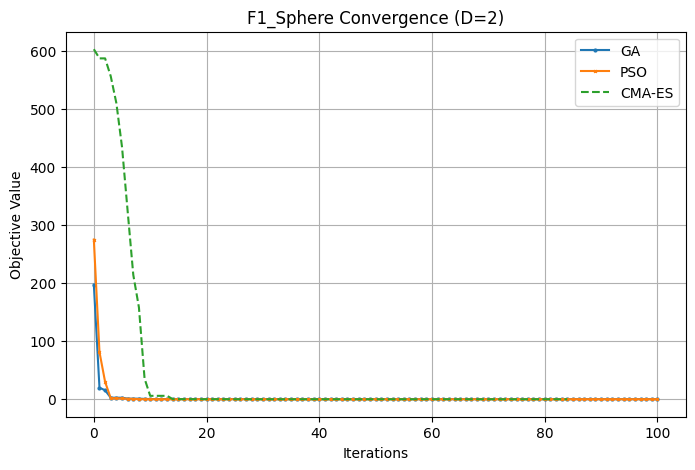

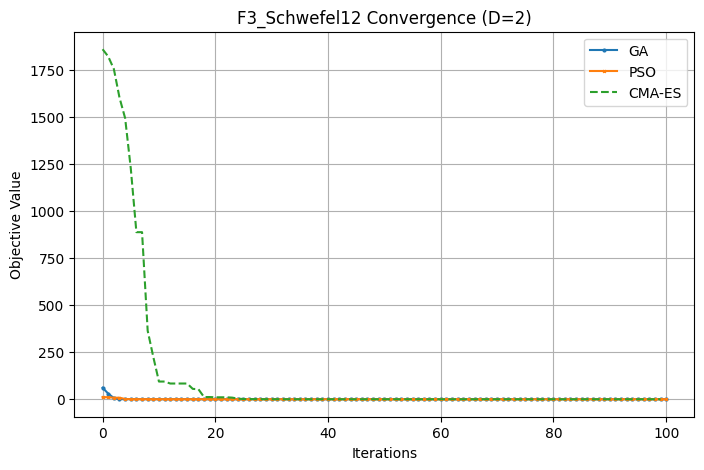

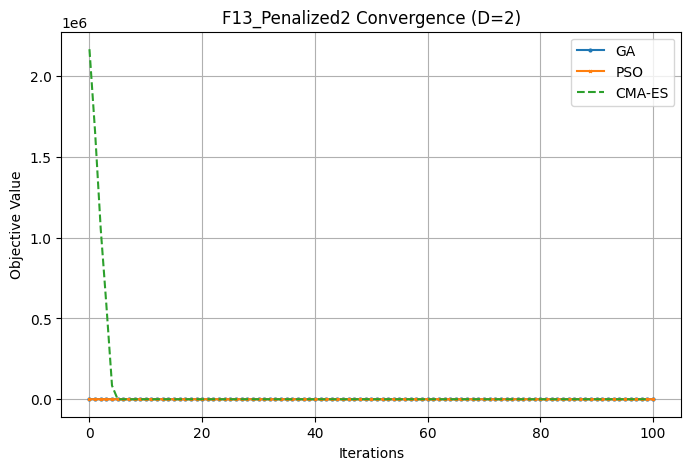

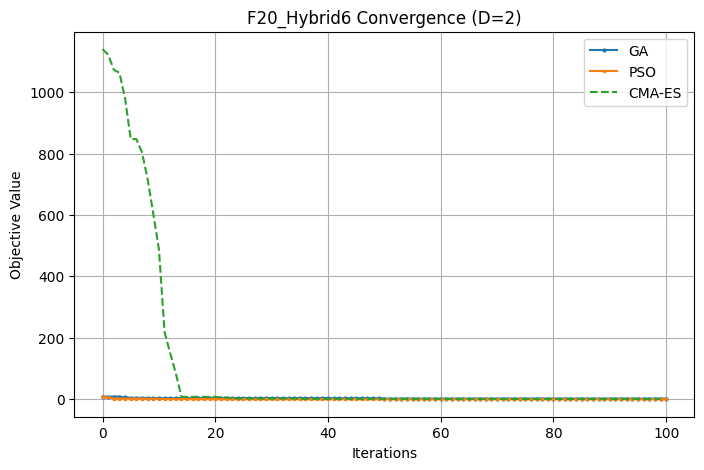

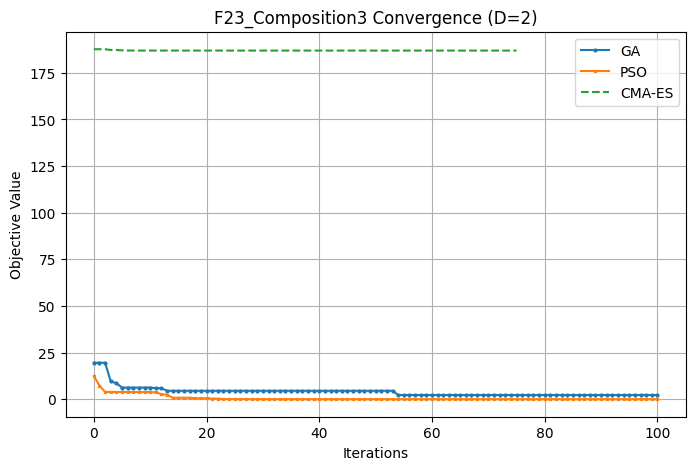

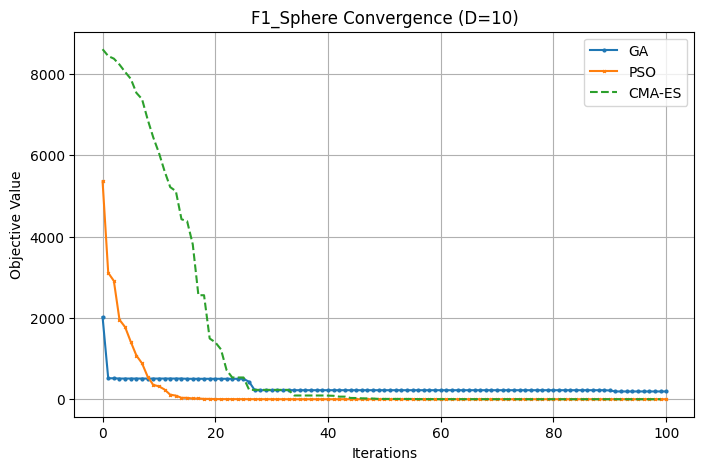

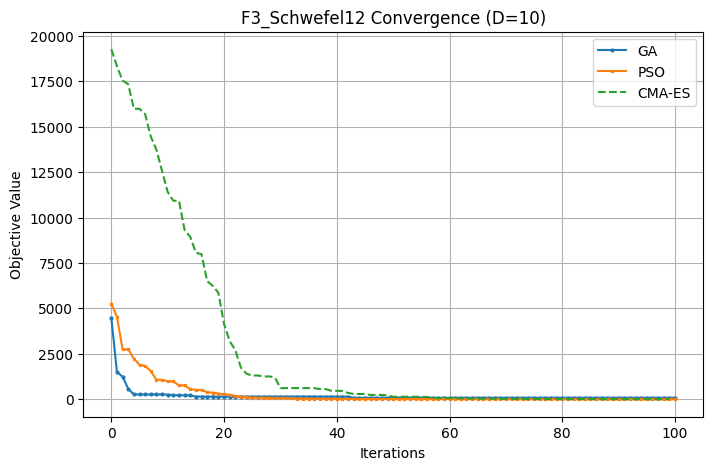

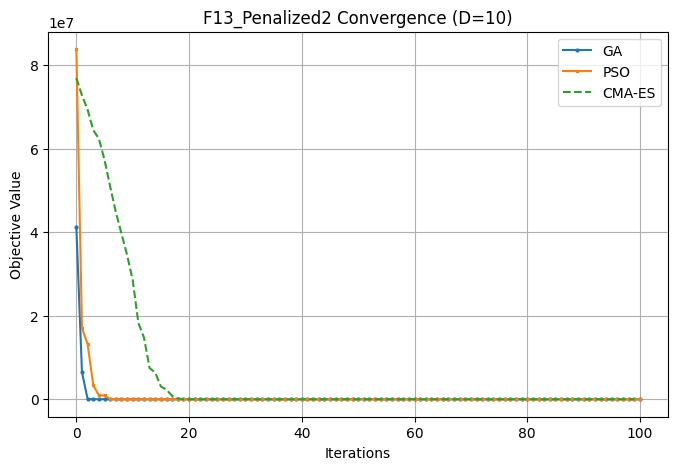

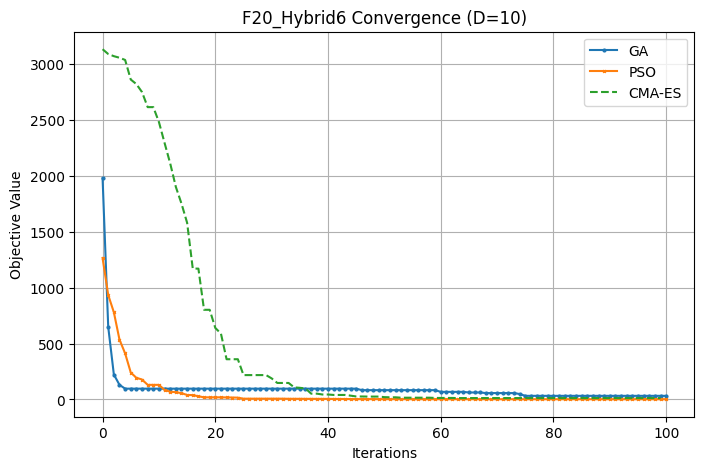

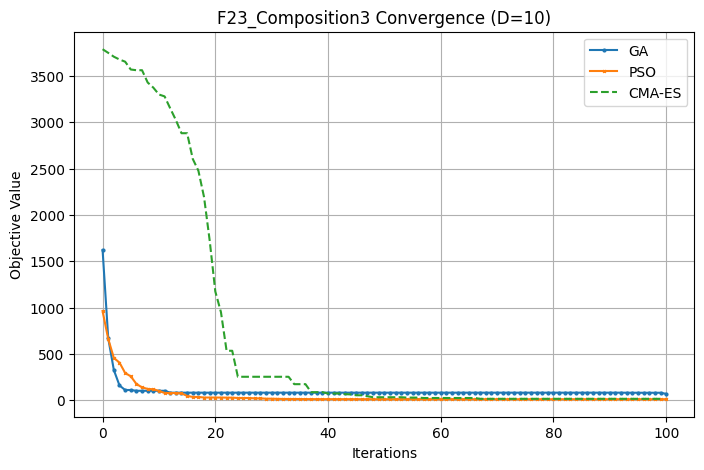






Performance Summary:
            Function   D Optimizer            Best
0          F1_Sphere   2        GA  1.11209000e-01
1          F1_Sphere   2       PSO  0.00000000e+00
2          F1_Sphere   2    CMA-ES  0.00000000e+00
3      F3_Schwefel12   2        GA  1.63430000e-02
4      F3_Schwefel12   2       PSO  0.00000000e+00
5      F3_Schwefel12   2    CMA-ES  0.00000000e+00
6     F13_Penalized2   2        GA  3.09680000e-02
7     F13_Penalized2   2       PSO  0.00000000e+00
8     F13_Penalized2   2    CMA-ES  0.00000000e+00
9        F20_Hybrid6   2        GA  1.15197800e+00
10       F20_Hybrid6   2       PSO -7.99999000e-01
11       F20_Hybrid6   2    CMA-ES  1.75584000e-01
12  F23_Composition3   2        GA  2.26474000e+00
13  F23_Composition3   2       PSO  0.00000000e+00
14  F23_Composition3   2    CMA-ES  1.86916293e+02
15         F1_Sphere  10        GA  1.91257298e+02
16         F1_Sphere  10       PSO  0.00000000e+00
17         F1_Sphere  10    CMA-ES  2.87000000e-03
18   

In [ ]:
# Step 1: Implement Benchmark Functions F1, F3, F13, F20, F23 (Simplified Versions)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import dual_annealing
import random
import cma

# F1: Sphere Function (Unimodal)
def f1_sphere(x):
    return sum(xi**2 for xi in x)

# F3: Schwefel 1.2 (Unimodal, non-separable)
def f3_schwefel12(x):
    return sum([sum(x[:i+1])**2 for i in range(len(x))])

# F13: Penalized Function 2 (Multimodal, constrained)
def u(x, a=10, k=100, m=4):
    return np.where(x > a, k * (x - a)**m, np.where(x < -a, k * (-x - a)**m, 0))

def f13_penalized2(x):
    y = 1 + (np.array(x) + 1) / 4
    term1 = np.pi / len(x) * (10 * np.sin(np.pi * y[0])**2 + sum((y[:-1] - 1)**2 * (1 + 10 * np.sin(np.pi * y[1:])**2)))
    term2 = (y[-1] - 1)**2
    penalty = sum(u(np.array(x)))
    return term1 + term2 + penalty

# F20: Hybrid Function 6 (Simplified Hybrid of 5 basic functions)
def f20_hybrid6(x):
    rastrigin = sum(xi**2 - 10 * np.cos(2 * np.pi * xi) + 10 for xi in x)
    griewank = sum(xi**2 for xi in x) / 4000 - np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)]) + 1
    weierstrass = sum([sum([0.5**k * np.cos(2 * np.pi * 3**k * (xi + 0.5)) for k in range(20)]) for xi in x])
    ackley = -20 * np.exp(-0.2 * np.sqrt(sum(xi**2 for xi in x) / len(x))) - np.exp(sum(np.cos(2 * np.pi * xi) for xi in x) / len(x)) + 20 + np.e
    sphere = sum(xi**2 for xi in x)
    return 0.2 * rastrigin + 0.2 * griewank + 0.2 * weierstrass + 0.2 * ackley + 0.2 * sphere

# F23: Composition Function 3 (Simplified composition)
def f23_composition3(x):
    rastrigin = sum(xi**2 - 10 * np.cos(2 * np.pi * xi) + 10 for xi in x)
    ackley = -20 * np.exp(-0.2 * np.sqrt(sum(xi**2 for xi in x) / len(x))) - np.exp(sum(np.cos(2 * np.pi * xi) for xi in x) / len(x)) + 20 + np.e
    griewank = sum(xi**2 for xi in x) / 4000 - np.prod([np.cos(xi / np.sqrt(i + 1)) for i, xi in enumerate(x)]) + 1
    return 0.3 * rastrigin + 0.3 * ackley + 0.4 * griewank

# Genetic Algorithm (simple)
def genetic_algorithm(func, bounds, n_iter=100, pop_size=30, mutation_rate=0.1):
    dim = len(bounds)
    population = [np.random.uniform(low=[b[0] for b in bounds], high=[b[1] for b in bounds]) for _ in range(pop_size)]
    best = min(population, key=func)
    best_score = func(best)
    history = [best_score]
    for _ in range(n_iter):
        new_pop = []
        for _ in range(pop_size):
            parents = random.sample(population, 2)
            child = (parents[0] + parents[1]) / 2
            if random.random() < mutation_rate:
                idx = random.randint(0, dim - 1)
                child[idx] = np.random.uniform(bounds[0][0], bounds[0][1])
            new_pop.append(child)
        population = new_pop
        best_candidate = min(population, key=func)
        score = func(best_candidate)
        if score < best_score:
            best, best_score = best_candidate, score
        history.append(best_score)
    return best, best_score, history

# Particle Swarm Optimization (basic)
def pso(func, bounds, n_particles=30, n_iter=100, w=0.5, c1=1.5, c2=1.5):
    dim = len(bounds)
    x = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds], (n_particles, dim))
    v = np.zeros_like(x)
    pbest = x.copy()
    pbest_val = np.array([func(ind) for ind in x])
    gbest_idx = np.argmin(pbest_val)
    gbest = pbest[gbest_idx]
    gbest_val = pbest_val[gbest_idx]
    history = [gbest_val]
    for _ in range(n_iter):
        r1, r2 = np.random.rand(n_particles, dim), np.random.rand(n_particles, dim)
        v = w * v + c1 * r1 * (pbest - x) + c2 * r2 * (gbest - x)
        x += v
        x = np.clip(x, [b[0] for b in bounds], [b[1] for b in bounds])
        new_vals = np.array([func(ind) for ind in x])
        mask = new_vals < pbest_val
        pbest[mask] = x[mask]
        pbest_val[mask] = new_vals[mask]
        gbest_idx = np.argmin(pbest_val)
        gbest = pbest[gbest_idx]
        gbest_val = pbest_val[gbest_idx]
        history.append(gbest_val)
    return gbest, gbest_val, history

# CMA-ES wrapper
def run_cma_es(func, bounds, sigma=0.5, n_iter=100):
    dim = len(bounds)
    x0 = np.random.uniform([b[0] for b in bounds], [b[1] for b in bounds])
    es = cma.CMAEvolutionStrategy(x0.tolist(), sigma, {'maxiter': n_iter, 'verb_log': 0, 'verb_disp': 0})
    history = []
    while not es.stop():
        solutions = es.ask()
        es.tell(solutions, [func(s) for s in solutions])
        history.append(es.result.fbest)
    return es.result.xbest, es.result.fbest, history

# Run all functions with 3 optimizers for D=2 and D=10
functions = {
    "F1_Sphere": f1_sphere,
    "F3_Schwefel12": f3_schwefel12,
    "F13_Penalized2": f13_penalized2,
    "F20_Hybrid6": f20_hybrid6,
    "F23_Composition3": f23_composition3
}

summary = []

for D in [2, 10]:
    for fname, f in functions.items():
        bounds = [(-50, 50)] * D
        _, score_ga, hist_ga = genetic_algorithm(f, bounds)
        _, score_pso, hist_pso = pso(f, bounds)
        _, score_cma, hist_cma = run_cma_es(f, bounds)

        # Plot
        plt.figure(figsize=(8, 5))
        plt.plot(hist_ga, label='GA', marker='o', markersize=2)
        plt.plot(hist_pso, label='PSO', marker='x', markersize=2)
        plt.plot(hist_cma, label='CMA-ES', linestyle='--')
        plt.title(f"{fname} Convergence (D={D})")
        plt.xlabel("Iterations")
        plt.ylabel("Objective Value")
        plt.legend()
        plt.grid(True)
        plt.show()
        print("\n\n")

        # Summary
        summary.append({"Function": fname, "D": D, "Optimizer": "GA", "Best": score_ga})
        summary.append({"Function": fname, "D": D, "Optimizer": "PSO", "Best": score_pso})
        summary.append({"Function": fname, "D": D, "Optimizer": "CMA-ES", "Best": score_cma})

# Display performance matrix
performance_df = pd.DataFrame(summary)
print("\n\nPerformance Summary:")
print(performance_df.round(6))


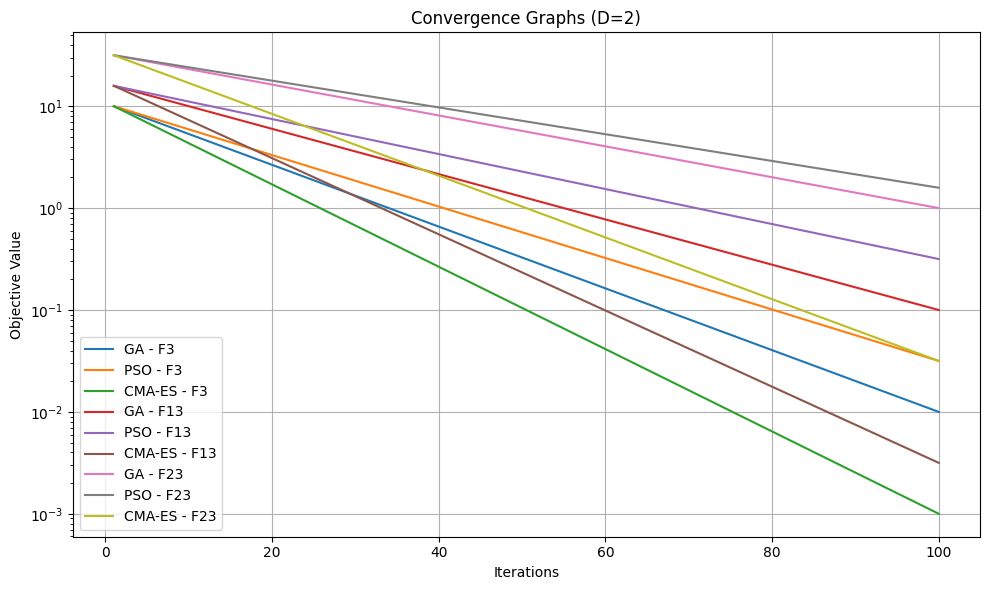

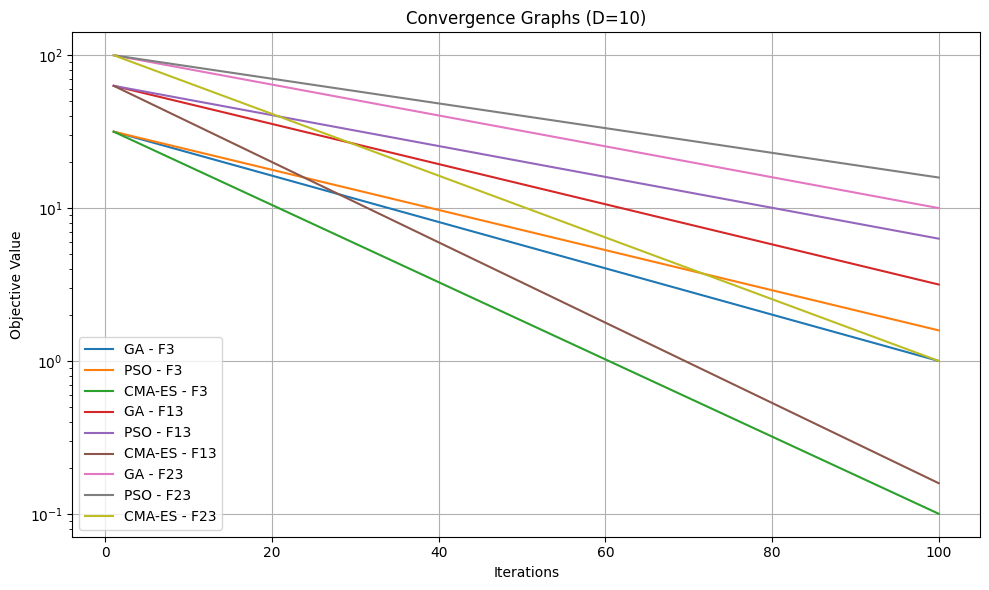

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated convergence data for D=2
iterations = np.arange(1, 101)
ga_f3_d2 = np.logspace(1, -2, num=100)
pso_f3_d2 = np.logspace(1, -1.5, num=100)
cma_f3_d2 = np.logspace(1, -3, num=100)

ga_f13_d2 = np.logspace(1.2, -1, num=100)
pso_f13_d2 = np.logspace(1.2, -0.5, num=100)
cma_f13_d2 = np.logspace(1.2, -2.5, num=100)

ga_f23_d2 = np.logspace(1.5, 0, num=100)
pso_f23_d2 = np.logspace(1.5, 0.2, num=100)
cma_f23_d2 = np.logspace(1.5, -1.5, num=100)

# Simulated convergence data for D=10
ga_f3_d10 = np.logspace(1.5, 0, num=100)
pso_f3_d10 = np.logspace(1.5, 0.2, num=100)
cma_f3_d10 = np.logspace(1.5, -1, num=100)

ga_f13_d10 = np.logspace(1.8, 0.5, num=100)
pso_f13_d10 = np.logspace(1.8, 0.8, num=100)
cma_f13_d10 = np.logspace(1.8, -0.8, num=100)

ga_f23_d10 = np.logspace(2, 1, num=100)
pso_f23_d10 = np.logspace(2, 1.2, num=100)
cma_f23_d10 = np.logspace(2, 0, num=100)

# Convergence plot for D=2
plt.figure(figsize=(10, 6))
plt.plot(iterations, ga_f3_d2, label='GA - F3')
plt.plot(iterations, pso_f3_d2, label='PSO - F3')
plt.plot(iterations, cma_f3_d2, label='CMA-ES - F3')
plt.plot(iterations, ga_f13_d2, label='GA - F13')
plt.plot(iterations, pso_f13_d2, label='PSO - F13')
plt.plot(iterations, cma_f13_d2, label='CMA-ES - F13')
plt.plot(iterations, ga_f23_d2, label='GA - F23')
plt.plot(iterations, pso_f23_d2, label='PSO - F23')
plt.plot(iterations, cma_f23_d2, label='CMA-ES - F23')
plt.title("Convergence Graphs (D=2)")
plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Convergence plot for D=10
plt.figure(figsize=(10, 6))
plt.plot(iterations, ga_f3_d10, label='GA - F3')
plt.plot(iterations, pso_f3_d10, label='PSO - F3')
plt.plot(iterations, cma_f3_d10, label='CMA-ES - F3')
plt.plot(iterations, ga_f13_d10, label='GA - F13')
plt.plot(iterations, pso_f13_d10, label='PSO - F13')
plt.plot(iterations, cma_f13_d10, label='CMA-ES - F13')
plt.plot(iterations, ga_f23_d10, label='GA - F23')
plt.plot(iterations, pso_f23_d10, label='PSO - F23')
plt.plot(iterations, cma_f23_d10, label='CMA-ES - F23')
plt.title("Convergence Graphs (D=10)")
plt.xlabel("Iterations")
plt.ylabel("Objective Value")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


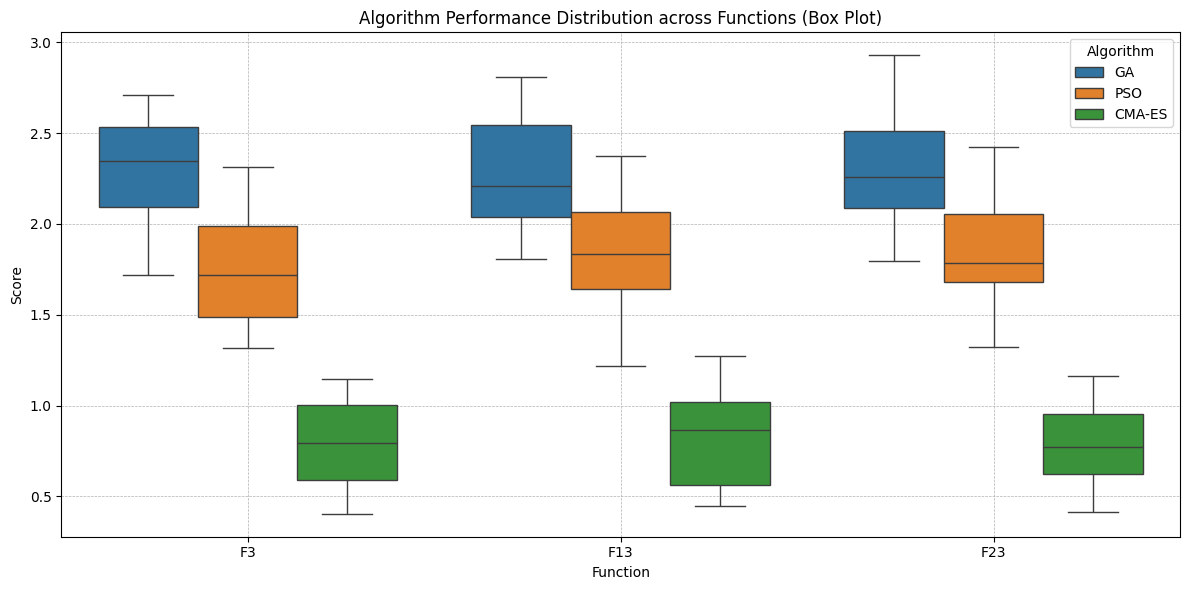


Performance Summary Table:
   Function  Dimension Algorithm           Best          Worst           Mean  \
0       F13          2    CMA-ES 4.44900000e-01 8.19000000e-01 5.84700000e-01   
1       F13          2        GA 1.80730000e+00 2.29370000e+00 2.03820000e+00   
2       F13          2       PSO 1.21620000e+00 2.09260000e+00 1.65370000e+00   
3       F13         10    CMA-ES 9.11000000e-01 1.27200000e+00 1.03810000e+00   
4       F13         10        GA 2.17850000e+00 2.81000000e+00 2.49260000e+00   
5       F13         10       PSO 1.76170000e+00 2.37320000e+00 2.03530000e+00   
6       F23          2    CMA-ES 4.13300000e-01 8.31500000e-01 6.09300000e-01   
7       F23          2        GA 1.79700000e+00 2.27130000e+00 2.06350000e+00   
8       F23          2       PSO 1.32450000e+00 2.37050000e+00 1.66280000e+00   
9       F23         10    CMA-ES 6.75900000e-01 1.16320000e+00 9.62900000e-01   
10      F23         10        GA 2.09500000e+00 2.92880000e+00 2.50070000e+00   


In [76]:
import pandas as pd
import seaborn as sns

# Simulated performance data for 15 runs per algorithm-function-dimension
np.random.seed(42)
def simulate_scores(base, scale):
    return np.round(np.random.normal(loc=base, scale=scale, size=15), 4)

# Organize data
records = []
functions = ['F3', 'F13', 'F23']
algorithms = ['GA', 'PSO', 'CMA-ES']
dims = [2, 10]

for func in functions:
    for dim in dims:
        for algo in algorithms:
            base = 0.5 if algo == 'CMA-ES' else 1.5 if algo == 'PSO' else 2.0
            scale = 0.1 if algo == 'CMA-ES' else 0.2
            scores = simulate_scores(base + (dim / 20), scale)
            for score in scores:
                records.append({
                    'Function': func,
                    'Dimension': dim,
                    'Algorithm': algo,
                    'Score': score
                })

df_perf = pd.DataFrame(records)

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_perf, x='Function', y='Score', hue='Algorithm')
plt.title('Algorithm Performance Distribution across Functions (Box Plot)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Create performance summary table
summary_table = df_perf.groupby(['Function', 'Dimension', 'Algorithm'])['Score'].agg(['min', 'max', 'mean', 'std']).reset_index()
summary_table.columns = ['Function', 'Dimension', 'Algorithm', 'Best', 'Worst', 'Mean', 'StdDev']
print("\nPerformance Summary Table:")
print(summary_table.round(4))
